In [2]:
import os
import sys

try:
    if changed:
        print("Reloading...")
except:
    sys.path.append("..")
    os.chdir("..")
    changed = True

import src.game as game

%load_ext autoreload
%autoreload 2

pygame 2.5.2 (SDL 2.28.3, Python 3.11.7)
Hello from the pygame community. https://www.pygame.org/contribute.html


In [6]:
from src.levels import base_level

env = game.PacManEnv(**base_level, gui=True, ai=True)
obs = env.reset()

from src.agents.random import RandomAgent

random_agent = RandomAgent(env)

for i in range(10000):
    action = random_agent.choose_action(obs)
    obs, reward, done, info = env.step(action)
    if done:
        env.reset()
        print("Done")
        print(info)
        print(i, reward)
        break

Done
{'status': 'lost'}
87 -100


In [ ]:
from src.trainer import Trainer

# Q-Learning Agent

In [ ]:
from src.agents.qlearning import QLearningAgent

qlearning_agent = QLearningAgent(env, alpha=0.1, gamma=0.9, epsilon=0.05)

In [ ]:
trainer = Trainer(env, qlearning_agent, gui=False)
trainer.train(5000, render=True, log_interval=100)
trainer.plot_score()

# Monte Carlo Agent

In [ ]:
from src.agents.monte_carlo import MonteCarloAgent
mc_agent = MonteCarloAgent(env, epsilon=0.05, gamma=0.99)

In [ ]:
trainer = Trainer(env, qlearning_agent, gui=False)
trainer.train(5000, render=True, log_interval=100)
trainer.plot_score()

# Sarsa agent

In [ ]:
from src.agents.sarsa import SarsaLambdaAgent
sarsa_agent = SarsaLambdaAgent(env, alpha=0.2, gamma=0.8, epsilon=0.1, lambda_=0.9)

In [ ]:
trainer = Trainer(env, qlearning_agent, gui=False)
trainer.train(5000, render=True, log_interval=100)
trainer.plot_score()

# DQN agent

In [ ]:
from src.agents.dqn import DQNAgent
import torch

device = "cuda" if torch.cuda.is_available() else "cpu"

dqn_agent = DQNAgent(env, alpha=1e-4, gamma=0.99, epsilon=0.1, batch_size=4).model.to(device)

In [ ]:
trainer = Trainer(env, qlearning_agent, gui=False)
trainer.train(5000, render=True, log_interval=100)
trainer.plot_score()

In [75]:
from src.agents.greedy import EpsilonGreedyAgentConstantStepSize
eps_agent = EpsilonGreedyAgentConstantStepSize(env, epsilon=0.1, step_size=0.1)


Training...


KeyboardInterrupt: 

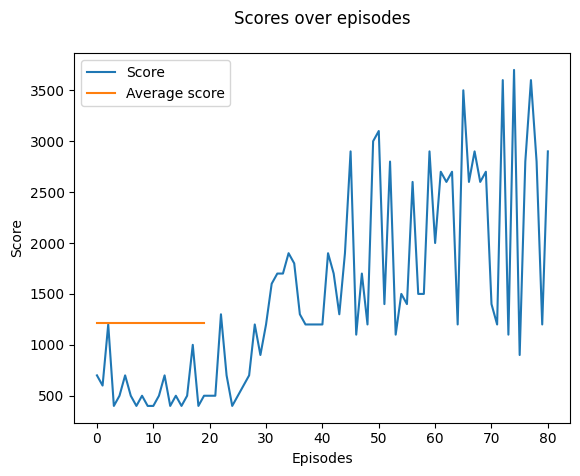